# Predicting Life Satisfaction number 

In [1]:
'''Current dataset is very small'''
#Importing Necessary libraies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and Preparing the OECD dataset

In [2]:
#Loading and reading OECD dataset
oecd = pd.read_csv('lifesat/oecd_bli_2015.csv', index_col=None, na_values=['NA'])

In [3]:
#Viewing first 5 records
oecd.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [4]:
#Creating pivot with country
oecd = oecd[oecd['INEQUALITY'] == "TOT"]
oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")
oecd.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [5]:
#Checking Life satisfaction column values 
oecd['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

## Loading and Preparing The GDP per Capita dataset from imf.org

In [6]:
#Reading gdp dataset
#dataset has multiple duplicate rows,considering only distinct rows,gives very little data
gdp = pd.read_csv('lifesat/gdp_per_capita.csv', delimiter='\t', encoding='latin1', na_values=['NA'])

In [7]:
gdp.rename(columns={"2015": "GDP per Capita"}, inplace=True)
gdp.set_index("Country", inplace=True)
gdp.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0


## Merging the datasets into single dataframe using pandas

In [8]:
full_country_set = pd.merge(left=oecd, right=gdp, left_index=True, right_index=True)
full_country_set.sort_values(by="GDP per Capita", inplace=True)
full_country_set

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per Capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Luxembourg,12.0,4.3,6.0,0.1,78.0,3.47,66.0,0.4,38951.0,61765.0,...,15.12,91.0,86.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","101,994.093",2014.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","12,239.894",2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","12,495.334",2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","13,340.905",2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","15,991.736",2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","17,256.918",2015.0
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,14.90,64.0,79.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","17,288.083",2014.0
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,14.91,64.0,69.0,18.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","18,064.288",2014.0
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,14.95,58.0,86.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","19,121.592",2014.0


In [9]:
full_country_set[['GDP per Capita', 'Life satisfaction']].loc['United States']

GDP per Capita       55,805.204
Life satisfaction           7.2
Name: United States, dtype: object

In [10]:
full_country_set[['GDP per Capita', 'Life satisfaction']].loc['Mexico']

GDP per Capita       9,009.280
Life satisfaction          6.7
Name: Mexico, dtype: object

In [11]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
sample_data = full_country_set[["GDP per Capita", "Life satisfaction"]].iloc[keep_indices]

In [12]:
sample_data.to_csv('life_satisfaction_vs_gdp_per_capita.csv')

In [13]:
sample_data.head(5)

,GDP per Capita,Life satisfaction
Country,,
Poland,"12,495.334",5.8
Chile,"13,340.905",6.7
Slovak Republic,"15,991.736",6.1
Czech Republic,"17,256.918",6.5
Greece,"18,064.288",4.8


In [14]:
columns = ["gdp_per_capita", "life_satisfaction"]
sample_data.columns = columns

In [15]:
sample_data.head(5)

,gdp_per_capita,life_satisfaction
Country,,
Poland,"12,495.334",5.8
Chile,"13,340.905",6.7
Slovak Republic,"15,991.736",6.1
Czech Republic,"17,256.918",6.5
Greece,"18,064.288",4.8


In [16]:
sample_data.gdp_per_capita = sample_data.gdp_per_capita.str.replace(',', '')
sample_data.gdp_per_capita = sample_data.gdp_per_capita.astype(float)

In [17]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
Xsample = np.c_[sample_data['gdp_per_capita']]
ysample = np.c_[sample_data['life_satisfaction']]
lr.fit(Xsample, ysample)
z0, z1 = lr.intercept_[0], lr.coef_[0][0]
z0, z1

(5.7657432899010068, 2.6454256462844228e-05)

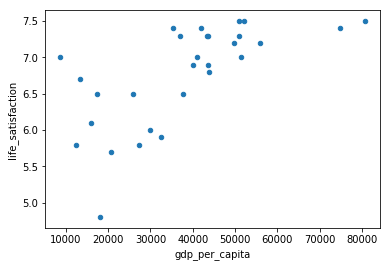

In [18]:
sample_data.plot(kind='scatter', x="gdp_per_capita", y="life_satisfaction")
plt.show()

## Predicting from model 

In [19]:
X_new = [[22587]]  #Cyprus' GDP per capita
print(lr.predict(X_new)) 

[[ 6.36326558]]


In [20]:
X_new1 = [[1709.39]] #India's GDP per capita
print(lr.predict(X_new1)) 

[[ 5.81096393]]
